### ライブラリをインポートする上での注意  
手元のPython環境次第ではインポートに失敗することがあります。その際はターミナルで
```
pip install -r requirements.txt
```
と試してください。

In [1]:
# 必要なライブラリのインポート
import pandas as pd
import chardet
import numpy as np
import math
import random
from tqdm import tqdm
from time import time
import matplotlib.pyplot as plt
import japanize_matplotlib
import plotly.graph_objs as go
import plotly.io as pio
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### データの整形

In [2]:
file_path = "capital_cities_2024.csv"

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
df = pd.read_csv(file_path, encoding=encoding)
df = df[["ja_ctry", "x", "y"]]
df = df.rename(columns={"ja_ctry":"国", "x":"lon", "y":"lat"})
#国・地域名をリストとして取得
Countries = df["国"].to_list()
#日本スタート、日本終了のリストにする。
Countries.remove('日本国')
Countries = ['日本国'] + Countries + ['日本国']
#緯度、経度を辞書として保存(コードの書きやすさのため)
lat, lon = dict(), dict()
for index, row in df.iterrows():
    lat[row["国"]] = np.radians(row["lat"])
    lon[row["国"]] = np.radians(row["lon"])

球体三角法の実装

In [3]:
def spherical_trigonometry(lat_p, lon_p, lat_q, lon_q):
    res = np.sin(lat_p) * np.sin(lat_q) + np.cos(lat_p) * np.cos(lat_q) * np.cos(lon_q - lon_p)
    res = np.arccos(res)
    R = 6378 # 地球の半径 (km)
    res *= R
    
    return res

In [4]:
def calculating_the_total_distance(Countries_list):
    N = len(Countries_list)
    res = 0
    for i in range(N-1):
        now_country, next_country = Countries_list[i], Countries_list[i+1]
        res += spherical_trigonometry(lat[now_country], lon[now_country], lat[next_country], lon[next_country])
    return res

メルカトル図法での結果の描画

In [5]:
def mercator_plot(Countries_list, filename):
    lats = [np.degrees(lat[Country]) for Country in Countries_list]
    lons = [np.degrees(lon[Country]) for Country in Countries_list]
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.Mercator())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    plt.plot(lons, lats, marker='o', linestyle='-', color='b', transform=ccrs.Geodetic())
    plt.xlabel("経度")
    plt.ylabel("緯度")
    plt.title(filename)
    plt.grid(True)
    plt.show()

地球儀上での結果の描画

In [6]:
def globe_plot(Countries_list, filename=None):
    lats = [df.loc[df['国']==Country, 'lat'].values[0] for Country in Countries_list]
    lons = [df.loc[df['国']==Country, 'lon'].values[0] for Country in Countries_list]

    line = go.Scattergeo(
        lon=lons,
        lat=lats,
        mode='lines+markers',
        line=dict(color='yellow', width=2),
        marker=dict(size=8, color='red')
    )

    layout = go.Layout(
        geo=dict(
            projection=dict(type='orthographic'),
            showcountries=True,
        ),
        margin=dict(r=10, l=10, b=10, t=10)
    )

    fig = go.Figure(data=[line], layout=layout)
    pio.show(fig)
    
    if filename:
        pio.write_html(fig, file = filename)

### 焼きなまし法を行う上での初期条件  
- 全ての場合において初期値は以下から始める。
- 実行時間は2秒とする。

In [7]:
print("初期値:", *Countries)
print("総距離:", calculating_the_total_distance(Countries), "km")

初期値: 日本国 バチカン市国 ニウエ サンマリノ リヒテンシュタイン ルクセンブルク ミクロネシア マーシャル諸島 ツバル パラオ モナコ キリバス コモロ アンドラ クック諸島 トリニダードトバゴ ルワンダ エスワティニ 南スーダン スロベニア スロバキア カタール モンテネグロ スイス コソボ ドミニカ ジブチ ガンビア 北マケドニア バルバドス ブルンジ セントビンセント及びグレナディーン諸島 セントルシア セントクリストファー・ネービス モーリシャス グレナダ バーレーン アンティグア・バーブーダ ウルグアイ トーゴ チュニジア アラブ首長国連邦 トルクメニスタン ザンビア ジンバブエ 東ティモール バヌアツ ホンジュラス ガイアナ アイスランド ハイチ ウガンダ スリナム ニジェール タジキスタン パラグアイ ニカラグア シエラレオネ パキスタン ネパール 南アフリカ共和国 パプアニューギニア ソロモン諸島 パナマ モロッコ モルドバ モザンビーク ソマリア オマーン スリランカ モンゴル ナミビア ナイジェリア ギニアビサウ ヨルダン リトアニア ラトビア キルギス レソト マダガスカル エクアドル コスタリカ エルサルバドル ジャマイカ チャド 赤道ギニア エリトリア クロアチア エストニア マラウイ グアテマラ ガボン フィジー モーリタニア マリ レバノン ジョージア カザフスタン ラオス コンゴ共和国 ギニア コートジボワール カナダ セルビア ブルネイ ベリーズ 中央アフリカ カメルーン アルバニア アルメニア アゼルバイジャン カンボジア ボリビア ベナン ブルガリア ベラルーシ ブータン ボツワナ オーストラリア ブルキナファソ ボスニアヘルツェゴビナ ミャンマー トンガ セーシェル サントメ・プリンシペ サモア マルタ モルディブ イスラエル カーボベルデ バハマ キプロス ニュージーランド ベトナム トルコ ハンガリー イエメン ルーマニア シリア ポルトガル スーダン ノルウェー ポーランド 朝鮮民主主義人民共和国 タンザニア アイルランド リベリア マレーシア キューバ チェコ クウェート ドミニカ共和国 ガーナ リビア フィンランド デンマーク ブラジル ベルギー バングラデシュ アンゴラ アルジェリア ベネズエラ ウクライナ 

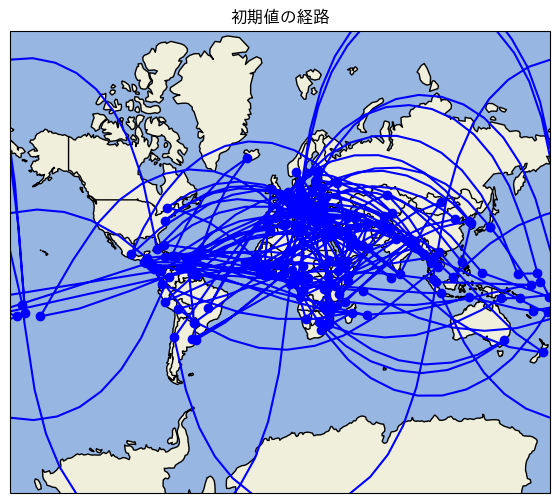

In [34]:
# メルカトル図法での初期値の描画
mercator_plot(Countries, '初期値の経路')

In [35]:
# 地球儀上への初期値の描画
globe_plot(Countries, 'init_root')

# 温度関数の違いによる結果の比較

### 冷却関数

In [8]:
def cooling_function1(init_temp, end_temp, start_time, max_time):
    T_max = math.exp(0)
    T_min  = math.exp(-max_time)
    T = math.exp(-(time() - start_time))
    res = end_temp  + (init_temp - end_temp)*((T - T_min) / (T_max - T_min))
    return res

In [9]:
def cooling_function2(init_temp, end_temp, start_time, max_time):
    T_max = 1/math.log(2)
    T_min  = 1/math.log(max_time + 2)
    T = 1/math.log((time() - start_time) + 2)
    res = end_temp  + (init_temp - end_temp)*((T - T_min) / (T_max - T_min))
    return res

評価関数

In [10]:
def cost_function(x, y, Countries_list):
    now_cost, next_cost = 0, 0
    x_pre_country, x_country, x_next_country = Countries_list[x-1:x+2]
    y_pre_country, y_country, y_next_country = Countries_list[y-1:y+2]
    now_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[x_country], lon[x_country])\
            + spherical_trigonometry(lat[x_country], lon[x_country], lat[x_next_country], lon[x_next_country])\
            + spherical_trigonometry(lat[y_pre_country], lon[y_pre_country], lat[y_country], lon[y_country])\
            + spherical_trigonometry(lat[y_country], lon[y_country], lat[y_next_country], lon[y_next_country])
    next_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[y_country], lon[y_country])\
            + spherical_trigonometry(lat[y_country], lon[y_country], lat[x_next_country], lon[x_next_country])\
            + spherical_trigonometry(lat[y_pre_country], lon[y_pre_country], lat[x_country], lon[x_country])\
            + spherical_trigonometry(lat[x_country], lon[x_country], lat[y_next_country], lon[y_next_country])
    return now_cost, next_cost

焼きなまし法

In [11]:
def simulated_annealing(Countries_list, cooling_function, cost_function, init_temp, end_temp, start_time, max_time):
    T = init_temp
    while time() - start_time <= max_time:
        a, b = random.choices(range(1, len(Countries_list)-1), k=2)
        now_cost, next_cost = cost_function(a, b, Countries_list)
        if next_cost < now_cost or random.random() < np.exp(-np.abs(now_cost - next_cost)/T):
            Countries_list[a], Countries_list[b] = Countries_list[b], Countries_list[a]
        T = cooling_function(init_temp, end_temp, start_time, max_time)
    return Countries_list

In [52]:
result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function1, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
print("焼きなましの結果:", *result)
print("総距離:", calculating_the_total_distance(result), "km")

C:\Users\belka\AppData\Local\Temp\ipykernel_10508\1130738863.py:3: RuntimeWarning: invalid value encountered in arccos
  res = np.arccos(res)


焼きなましの結果: 日本国 グアテマラ エクアドル ハイチ コロンビア チリ ウルグアイ アルゼンチン ニュージーランド バヌアツ ツバル キリバス ベトナム モンゴル ウズベキスタン キルギス アルメニア チェコ アイスランド リベリア ガンビア カナダ ベリーズ ペルー ボリビア パナマ ジャマイカ バルバドス トーゴ ガーナ 赤道ギニア ナイジェリア アルバニア セルビア オーストリア ベラルーシ フィンランド ウクライナ モルドバ ポーランド エジプト ジブチ ルワンダ 南スーダン カタール イラン タジキスタン バングラデシュ ミャンマー タイ 朝鮮民主主義人民共和国 ラオス 大韓民国 マレーシア インドネシア ケニア チャド 中央アフリカ マリ セントビンセント及びグレナディーン諸島 ベネズエラ ブラジル パラグアイ ニジェール ブルキナファソ コートジボワール ベナン サントメ・プリンシペ アンゴラ レソト エスワティニ エチオピア シリア ベルギー クロアチア スロベニア クウェート サウジアラビア バーレーン トルクメニスタン モルディブ スリランカ シンガポール サモア ニウエ トンガ クック諸島 オーストラリア 東ティモール ブータン ジョージア ネパール レバノン デンマーク ノルウェー ロシア連邦 アゼルバイジャン カザフスタン 中華人民共和国 ソロモン諸島 パプアニューギニア ミクロネシア パラオ フィジー ナウル マーシャル諸島 メキシコ アメリカ合衆国 ニカラグア ホンジュラス コスタリカ エルサルバドル スリナム ガイアナ セントルシア ドミニカ バハマ キューバ セネガル ギニア モロッコ イタリア モンテネグロ ボスニアヘルツェゴビナ コソボ モナコ サンマリノ スペイン ポルトガル セントクリストファー・ネービス アンティグア・バーブーダ グレナダ トリニダードトバゴ ドミニカ共和国 ギニアビサウ カーボベルデ シエラレオネ モーリタニア アルジェリア ルクセンブルク 北マケドニア ブルンジ チュニジア ザンビア マラウイ ジンバブエ ボツワナ コンゴ共和国 タンザニア ウガンダ カメルーン コンゴ民主共和国 ガボン バチカン市国 リビア マルタ スロバキア ハンガリー ドイツ リヒテンシュタイン スイス アンドラ フランス 

100回くらい焼きなましを実行

冷却関数が$e^{-t}$の場合

In [15]:
min_result = []
min_distance = float('inf')
average_distance = 0
for i in tqdm(range(100)):
    result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function1, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
    distance = calculating_the_total_distance(result)
    if distance < min_distance:
        min_distance = distance
        min_result = result.copy()
    average_distance += distance
print("最小の距離:", min_distance)
print("最小の距離での巡回順番:", *min_result)
print("平均:", average_distance/100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning:

invalid value encountered in arccos

100%|██████████| 100/100 [03:20<00:00,  2.00s/it]

最小の距離: 406531.4913191385
最小の距離での巡回順番: 日本国 パキスタン キルギス カザフスタン アゼルバイジャン モルドバ 北マケドニア ドイツ ポルトガル モロッコ サントメ・プリンシペ ニジェール 赤道ギニア マルタ イタリア チュニジア サンマリノ ルクセンブルク ウクライナ クウェート バーレーン モンゴル ブルネイ ラオス フィリピン パラオ 東ティモール カンボジア ミャンマー ベトナム キリバス フィジー パプアニューギニア オーストラリア ニュージーランド バヌアツ メキシコ クック諸島 グアテマラ エルサルバドル パナマ コスタリカ キューバ ドミニカ共和国 スリナム ドミニカ ハイチ ジャマイカ ニカラグア ベリーズ ホンジュラス コロンビア ペルー エクアドル ボリビア カナダ イギリス スロベニア オランダ フランス ギリシャ コソボ ヨルダン 中央アフリカ イスラエル トルクメニスタン タジキスタン カタール サウジアラビア チャド ナイジェリア アンゴラ ナミビア レソト エスワティニ 南アフリカ共和国 ボツワナ モザンビーク ジンバブエ マラウイ ルワンダ コンゴ民主共和国 ガボン カメルーン トーゴ コートジボワール カーボベルデ アイスランド アイルランド ベルギー デンマーク クロアチア ポーランド リトアニア オマーン エリトリア ソマリア ジブチ ブルンジ アルゼンチン ウルグアイ ブラジル パラグアイ モーリタニア マリ アンドラ アルバニア ブルガリア キプロス レバノン シリア ジョージア アルメニア イラク イラン アラブ首長国連邦 インド アフガニスタン イエメン ボスニアヘルツェゴビナ セルビア チェコ オーストリア スロバキア スイス スペイン アルジェリア モナコ リヒテンシュタイン スウェーデン ノルウェー アメリカ合衆国 セントビンセント及びグレナディーン諸島 アンティグア・バーブーダ セントクリストファー・ネービス セントルシア バルバドス ガイアナ トリニダードトバゴ グレナダ ベネズエラ チリ サモア トンガ ニウエ ソロモン諸島 ツバル マーシャル諸島 ミクロネシア ナウル ブータン モルディブ バチカン市国 リビア モンテネグロ トルコ エジプト マダガスカル ケニア モー

結果の描画

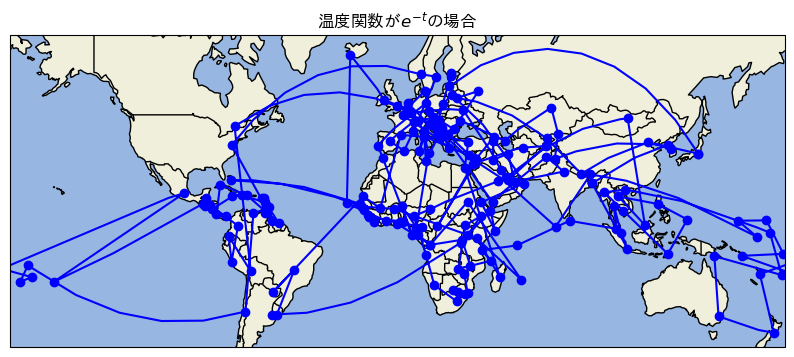

In [16]:
# メルカトル図法での初期値の描画
mercator_plot(min_result, '温度関数が$e^{-t}$の場合')

In [17]:
# 地球儀上への初期値の描画
globe_plot(Countries, 'temp1')

冷却関数が$\frac{1}{\log{(t+2)}}$の場合

In [12]:
min_result = []
min_distance = float('inf')
average_distance = 0
for i in tqdm(range(100)):
    result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function2, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
    distance = calculating_the_total_distance(result)
    if distance < min_distance:
        min_distance = distance
        min_result = result.copy()
    average_distance += distance
print("最小の距離:", min_distance)
print("最小の距離での巡回順番:", *min_result)
print("平均:", average_distance/100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning: invalid value encountered in arccos
  res = np.arccos(res)
100%|██████████| 100/100 [03:20<00:00,  2.01s/it]

最小の距離: 405212.95996448514
最小の距離での巡回順番: 日本国 マーシャル諸島 大韓民国 タイ マレーシア カンボジア 中華人民共和国 パキスタン ブルガリア キプロス ルクセンブルク トルコ ウクライナ アフガニスタン ウズベキスタン ネパール インド アゼルバイジャン シリア モンテネグロ ヨルダン モルドバ リビア マダガスカル モーリシャス イスラエル フランス ポルトガル アルジェリア チャド ナミビア ボツワナ 南アフリカ共和国 ジンバブエ ザンビア コモロ エチオピア レバノン イラク オマーン ジブチ エリトリア イエメン ウガンダ 中央アフリカ コンゴ共和国 アンゴラ コンゴ民主共和国 コートジボワール ニジェール アルバニア ボスニアヘルツェゴビナ リヒテンシュタイン ハンガリー スロバキア ポーランド ベラルーシ スウェーデン サンマリノ バチカン市国 北マケドニア 南スーダン ケニア ブルンジ レソト エスワティニ モザンビーク マラウイ ソマリア セーシェル ニュージーランド オーストラリア バヌアツ ソロモン諸島 パプアニューギニア ブルネイ インドネシア ミャンマー スリランカ バングラデシュ ブータン トルクメニスタン タジキスタン 朝鮮民主主義人民共和国 バハマ ジャマイカ ハイチ ベネズエラ コロンビア エクアドル パナマ ホンジュラス スリナム セントビンセント及びグレナディーン諸島 バルバドス セントルシア カーボベルデ セネガル ブラジル リベリア パラグアイ グレナダ ドミニカ共和国 セントクリストファー・ネービス トリニダードトバゴ アンティグア・バーブーダ キューバ エルサルバドル グアテマラ ベリーズ ニカラグア コスタリカ メキシコ アメリカ合衆国 カナダ ドミニカ カメルーン 赤道ギニア タンザニア ルワンダ コソボ アンドラ モルディブ シンガポール パラオ フィリピン 東ティモール フィジー ニウエ トンガ ツバル クック諸島 サモア キリバス ミクロネシア ナウル ベトナム ラオス キルギス ロシア連邦 ラトビア フィンランド オランダ ベルギー イギリス モロッコ ギニア トーゴ ガボン ベナン ナイジェリア ガーナ ブルキナファソ モーリタニア ギニアビサウ ペルー ボリビア チリ

結果の描画

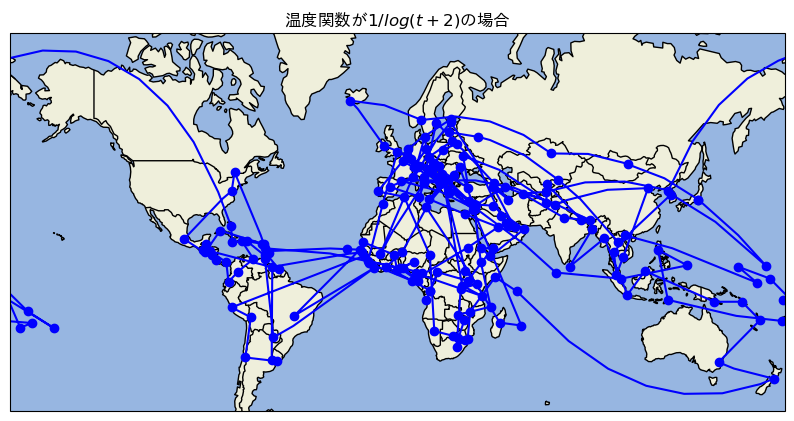

In [13]:
# メルカトル図法での初期値の描画
mercator_plot(min_result, '温度関数が$1/log(t+2)$の場合')

In [14]:
# 地球儀上への初期値の描画
globe_plot(Countries, 'temp2')

# 摂動の選び方による結果の比較

In [18]:
def cooling_function(init_temp, end_temp, start_time, max_time):
    T_max = math.exp(0)
    T_min  = math.exp(-max_time)
    T = math.exp(-(time() - start_time))
    res = end_temp  + (init_temp - end_temp)*((T - T_min) / (T_max - T_min))
    return res

### 2都市をランダムに選び、入れ替える方法の場合

In [19]:
def cost_function(x, y, Countries_list):
    now_cost, next_cost = 0, 0
    x_pre_country, x_country, x_next_country = Countries_list[x-1:x+2]
    y_pre_country, y_country, y_next_country = Countries_list[y-1:y+2]
    now_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[x_country], lon[x_country])\
            + spherical_trigonometry(lat[x_country], lon[x_country], lat[x_next_country], lon[x_next_country])\
            + spherical_trigonometry(lat[y_pre_country], lon[y_pre_country], lat[y_country], lon[y_country])\
            + spherical_trigonometry(lat[y_country], lon[y_country], lat[y_next_country], lon[y_next_country])
    next_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[y_country], lon[y_country])\
            + spherical_trigonometry(lat[y_country], lon[y_country], lat[x_next_country], lon[x_next_country])\
            + spherical_trigonometry(lat[y_pre_country], lon[y_pre_country], lat[x_country], lon[x_country])\
            + spherical_trigonometry(lat[x_country], lon[x_country], lat[y_next_country], lon[y_next_country])
    return now_cost, next_cost

def simulated_annealing(Countries_list, cooling_function, cost_function, init_temp, end_temp, start_time, max_time):
    T = init_temp
    # cnt = 0
    while time() - start_time <= max_time:
        # cnt += 1
        a, b = random.choices(range(1, len(Countries_list)-1), k=2)
        now_cost, next_cost = cost_function(a, b, Countries_list)
        if next_cost < now_cost or random.random() < np.exp(-np.abs(now_cost - next_cost)/T):
            Countries_list[a], Countries_list[b] = Countries_list[b], Countries_list[a]
        T = cooling_function(init_temp, end_temp, start_time, max_time)
    # print('摂動回数:', cnt)
    return Countries_list

In [20]:
result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
print("焼きなましの結果:", *result)
print("総距離:", calculating_the_total_distance(result), "km")

C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning:

invalid value encountered in arccos



焼きなましの結果: 日本国 マーシャル諸島 キリバス ツバル チリ ウルグアイ リベリア ドミニカ共和国 ドミニカ スリナム バルバドス ハイチ グレナダ トリニダードトバゴ セントルシア アイスランド バハマ アルジェリア バチカン市国 モナコ シエラレオネ セントクリストファー・ネービス 北マケドニア スロバキア ブルガリア ボスニアヘルツェゴビナ チェコ ドイツ スロベニア クロアチア デンマーク リトアニア ロシア連邦 ミクロネシア カナダ キューバ ニカラグア パナマ ベリーズ メキシコ コスタリカ ホンジュラス エルサルバドル グアテマラ ソロモン諸島 ナウル タイ ベトナム ブータン ミャンマー シンガポール オーストリア ベラルーシ コソボ モンテネグロ リビア コートジボワール ガンビア サントメ・プリンシペ ルワンダ ジンバブエ ボツワナ ザンビア ソマリア タンザニア ケニア マラウイ ナミビア カーボベルデ ポルトガル モロッコ アイルランド フランス アンドラ サンマリノ イタリア チュニジア ガーナ トーゴ ギニア ギニアビサウ セネガル モーリタニア マリ ベナン 赤道ギニア チャド コンゴ共和国 ガボン アンゴラ コンゴ民主共和国 中央アフリカ ヨルダン イスラエル アルバニア ギリシャ マルタ ルクセンブルク ベネズエラ セントビンセント及びグレナディーン諸島 ジャマイカ ポーランド スウェーデン キルギス カザフスタン スリランカ 南スーダン ニジェール ブルキナファソ エチオピア ジブチ エリトリア エジプト シリア トルクメニスタン アフガニスタン ウクライナ リヒテンシュタイン スペイン ノルウェー 大韓民国 フィリピン パラオ 中華人民共和国 マレーシア バングラデシュ ネパール アラブ首長国連邦 オマーン ラオス インドネシア パプアニューギニア バヌアツ フィジー フィンランド エストニア ラトビア イギリス オランダ ベルギー スイス ブラジル アルゼンチン ボリビア ペルー パラグアイ コロンビア エクアドル アメリカ合衆国 アンティグア・バーブーダ ガイアナ ナイジェリア カメルーン ブルンジ モザンビーク レソト 南アフリカ共和国 エスワティニ マダガスカル モーリシャス コモロ オーストラリア トンガ サモア

100回実行し、平均や最短の結果を見るためのコード

In [21]:
min_result = []
min_distance = float('inf')
average_distance = 0
for i in tqdm(range(100)):
    result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
    distance = calculating_the_total_distance(result)
    if distance < min_distance:
        min_distance = distance
        min_result = result.copy()
    average_distance += distance
print("最小の距離:", min_distance)
print("最小の距離での巡回順番:", *min_result)
print("平均:", average_distance/100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning:

invalid value encountered in arccos

100%|██████████| 100/100 [03:20<00:00,  2.00s/it]

最小の距離: 397143.37396547245
最小の距離での巡回順番: 日本国 ベラルーシ アイスランド バルバドス スリナム セントルシア ハイチ セントビンセント及びグレナディーン諸島 ギニアビサウ セネガル ガンビア モーリタニア バチカン市国 モナコ チュニジア ブルガリア キルギス カザフスタン トルクメニスタン アゼルバイジャン トルコ ルーマニア クロアチア マルタ リビア ニジェール ブルキナファソ リベリア シエラレオネ ベナン サントメ・プリンシペ ナイジェリア 中央アフリカ スリランカ アフガニスタン パキスタン タジキスタン コソボ クウェート ヨルダン レバノン ナミビア コンゴ民主共和国 赤道ギニア スロベニア ハンガリー ジョージア モルドバ キプロス シリア エジプト カメルーン ガボン ギニア アンティグア・バーブーダ エクアドル グアテマラ ベリーズ キューバ ジャマイカ ガイアナ ボリビア コロンビア ブラジル ボツワナ レソト 南アフリカ共和国 ザンビア ジンバブエ ルワンダ ブルンジ チャド モンテネグロ アルバニア 北マケドニア セルビア オーストリア フランス イギリス ノルウェー アイルランド バハマ ニカラグア カナダ アメリカ合衆国 セントクリストファー・ネービス ドミニカ共和国 クック諸島 ニウエ サモア ニュージーランド オーストラリア キリバス フィジー トンガ モーリシャス コモロ タンザニア マラウイ コンゴ共和国 アンゴラ ウガンダ エチオピア 南スーダン ジブチ サウジアラビア イエメン スーダン エリトリア イラク イスラエル イラン アルメニア エストニア ロシア連邦 ウクライナ リトアニア フィンランド スウェーデン リヒテンシュタイン アルジェリア モロッコ ポルトガル スペイン アンドラ ベルギー デンマーク ボスニアヘルツェゴビナ ギリシャ ベトナム マレーシア モルディブ インド バングラデシュ ブルネイ シンガポール カンボジア インドネシア 大韓民国 スロバキア オランダ ドイツ チェコ ラトビア ポーランド サンマリノ イタリア スイス ルクセンブルク メキシコ エルサルバドル ホンジュラス コスタリカ ペルー チリ パラグアイ ウルグアイ アルゼンチン パナマ ベネズエラ 

結果の描画

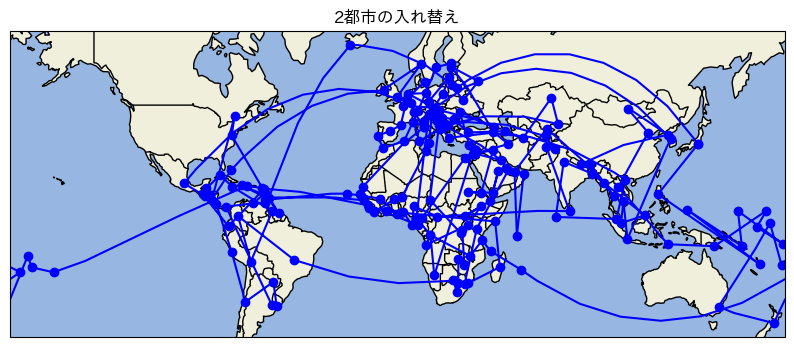

In [22]:
# メルカトル図法での初期値の描画
mercator_plot(min_result, '2都市の入れ替え')

In [23]:
# 地球儀上への初期値の描画
globe_plot(Countries, 'two-city-swap')

### 挿入による方法の場合

In [24]:
def cost_function(x, y, Countries_list):
    now_cost, next_cost = 0, 0
    x_pre_country, x_country, x_next_country = Countries_list[x-1:x+2]
    y_pre_country, y_next_country = Countries_list[y:y+2]
    now_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[x_country], lon[x_country])\
            + spherical_trigonometry(lat[x_country], lon[x_country], lat[x_next_country], lon[x_next_country])\
            + spherical_trigonometry(lat[y_pre_country], lon[y_pre_country], lat[y_next_country], lon[y_next_country])
    Countries_list.pop(x)
    Countries_list.insert(y, x_country)
    next_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[x_next_country], lon[x_next_country])\
            + spherical_trigonometry(lat[y_pre_country], lon[y_pre_country], lat[x_country], lon[x_country])\
            + spherical_trigonometry(lat[x_country], lon[x_country], lat[y_next_country], lon[y_next_country])
    return now_cost, next_cost

def simulated_annealing(Countries_list, cooling_function, cost_function, init_temp, end_temp, start_time, max_time):
    T = init_temp
    # cnt = 0
    while time() - start_time <= max_time:
        # cnt += 1
        a, b = random.choices(range(1, len(Countries_list)-1), k=2)
        now_cost, next_cost = cost_function(a, b, Countries_list)
        if not (next_cost < now_cost or random.random() < np.exp(-np.abs(now_cost - next_cost)/T)):
            Country = Countries_list.pop(b)
            Countries_list.insert(a, Country)
        T = cooling_function(init_temp, end_temp, start_time, max_time)
    # print('摂動回数:', cnt)
    return Countries_list

In [25]:
result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
print("焼きなましの結果:", *result)
print("総距離:", calculating_the_total_distance(result), "km")

C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning:

invalid value encountered in arccos



焼きなましの結果: 日本国 シリア サウジアラビア イラン クウェート アフガニスタン キルギス タジキスタン インド バングラデシュ モルディブ ネパール ブータン ベトナム モンゴル ベルギー フランス リヒテンシュタイン ルーマニア スイス ポルトガル モロッコ モナコ アルジェリア コソボ モルドバ ギリシャ イスラエル アゼルバイジャン マラウイ ボツワナ ナミビア サントメ・プリンシペ カメルーン ブルキナファソ モーリタニア ギニア リベリア ブラジル パラグアイ コロンビア パナマ エクアドル セントルシア ドミニカ グレナダ セントビンセント及びグレナディーン諸島 チリ アルゼンチン ウルグアイ オーストラリア フィジー ニュージーランド ソロモン諸島 ツバル ナウル ブルネイ バヌアツ ミャンマー ラオス タイ セーシェル マダガスカル エスワティニ モーリシャス パプアニューギニア サモア トンガ ミクロネシア マーシャル諸島 キリバス ニウエ クック諸島 ボリビア ガイアナ セントクリストファー・ネービス ベネズエラ スリナム トリニダードトバゴ バルバドス アンドラ エストニア フィンランド スウェーデン トルコ キプロス 南スーダン ケニア ブルンジ 赤道ギニア ガボン モンテネグロ セルビア アルバニア カーボベルデ ベナン コートジボワール チャド ニジェール マリ ガーナ トーゴ ギニアビサウ シエラレオネ ガンビア セネガル アンティグア・バーブーダ バハマ キューバ エルサルバドル ニカラグア コスタリカ ペルー メキシコ アメリカ合衆国 ベリーズ ドミニカ共和国 ハイチ グアテマラ ホンジュラス ジャマイカ カナダ デンマーク リトアニア ラトビア ノルウェー サンマリノ リビア スペイン バチカン市国 イギリス オランダ ポーランド 北マケドニア ハンガリー アルメニア ウズベキスタン トルクメニスタン アラブ首長国連邦 エチオピア ウガンダ ルワンダ レソト モザンビーク ジブチ ソマリア スーダン ナイジェリア コンゴ民主共和国 中央アフリカ コモロ コンゴ共和国 マルタ チェコ ブルガリア チュニジア オーストリア ベラルーシ ロシア連邦 スロバキア エジプト ヨルダン イエメン エリトリア アンゴラ タンザニア ジン

100回実行し、平均や最短の結果を見るためのコード

In [26]:
min_result = []
min_distance = float('inf')
average_distance = 0
for i in tqdm(range(100)):
    result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
    distance = calculating_the_total_distance(result)
    if distance < min_distance:
        min_distance = distance
        min_result = result.copy()
    average_distance += distance
print("最小の距離:", min_distance)
print("最小の距離での巡回順番:", *min_result)
print("平均:", average_distance/100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning:

invalid value encountered in arccos

100%|██████████| 100/100 [03:20<00:00,  2.00s/it]

最小の距離: 360077.7264521412
最小の距離での巡回順番: 日本国 シリア エジプト ジブチ ナミビア アンゴラ コンゴ共和国 ウガンダ 南スーダン マリ コートジボワール マルタ ニジェール スロベニア ボスニアヘルツェゴビナ アイルランド ノルウェー クロアチア オーストリア スロバキア アゼルバイジャン アルメニア イラン トルクメニスタン カザフスタン カタール バーレーン レバノン イラク ソマリア タンザニア コモロ マダガスカル モーリシャス ブルンジ 赤道ギニア ガボン コンゴ民主共和国 ギリシャ モルドバ コソボ 北マケドニア ブルガリア ロシア連邦 リトアニア ウクライナ イエメン エチオピア エリトリア ポルトガル アルジェリア アルバニア ルーマニア トルコ キプロス イスラエル ジョージア パキスタン ネパール スリランカ モルディブ ウズベキスタン フィンランド スペイン ハンガリー ガイアナ ギニアビサウ カーボベルデ セネガル サントメ・プリンシペ カメルーン チャド ナイジェリア 中央アフリカ モーリタニア ギニア ガンビア セントクリストファー・ネービス ドミニカ共和国 ハイチ バハマ メキシコ エルサルバドル グアテマラ ジャマイカ セントビンセント及びグレナディーン諸島 バルバドス グレナダ ドミニカ スリナム セントルシア アメリカ合衆国 カナダ ベリーズ ホンジュラス コスタリカ ニカラグア パナマ キューバ ブラジル ボリビア ペルー エクアドル トリニダードトバゴ パラグアイ アンティグア・バーブーダ アイスランド ラトビア スウェーデン エストニア ベラルーシ ポーランド デンマーク モンテネグロ ドイツ リヒテンシュタイン ルクセンブルク イギリス フランス スイス サンマリノ チュニジア チェコ オランダ ベルギー バチカン市国 モナコ イタリア セルビア ヨルダン サウジアラビア インド ブータン タイ カンボジア ベトナム ナウル キリバス ミクロネシア ソロモン諸島 東ティモール バングラデシュ タジキスタン キルギス アフガニスタン スーダン クウェート オマーン アラブ首長国連邦 セーシェル ケニア ルワンダ ザンビア ジンバブエ エスワティニ マラウイ ボツワナ 南アフリカ共和国 モザ

結果の描画

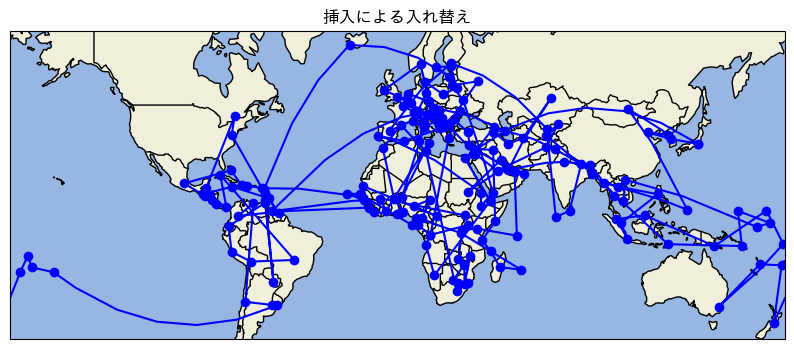

In [27]:
# メルカトル図法での初期値の描画
mercator_plot(min_result, '挿入による入れ替え')

In [28]:
# 地球儀上への初期値の描画
globe_plot(Countries, 'insert-swap')

### 順路を逆順にする方法の場合

In [29]:
def cost_function(x, y, Countries_list):
    now_cost, next_cost = 0, 0
    x_pre_country, x_country = Countries_list[x-1:x+1]
    y_country, y_next_country = Countries_list[y:y+2]
    now_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[x_country], lon[x_country])\
            + spherical_trigonometry(lat[y_country], lon[y_country], lat[y_next_country], lon[y_next_country])
    next_cost = spherical_trigonometry(lat[x_pre_country], lon[x_pre_country], lat[y_country], lon[y_country])\
            + spherical_trigonometry(lat[x_country], lon[x_country], lat[y_next_country], lon[y_next_country])
    return now_cost, next_cost

def simulated_annealing(Countries_list, cooling_function, cost_function, init_temp, end_temp, start_time, max_time):
    T = init_temp
    # cnt = 0
    while time() - start_time <= max_time:
        # cnt += 1
        a, b = random.choices(range(1, len(Countries_list)-1), k=2)
        now_cost, next_cost = cost_function(a, b, Countries_list)
        if next_cost < now_cost or random.random() < np.exp(-np.abs(now_cost - next_cost)/T):
            Countries_list[a:b+1] = Countries_list[a:b+1][::-1]
        T = cooling_function(init_temp, end_temp, start_time, max_time)
    # print('摂動回数:', cnt)
    return Countries_list

In [30]:
result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
print("焼きなましの結果:", *result)
print("総距離:", calculating_the_total_distance(result), "km")

C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning:

invalid value encountered in arccos



焼きなましの結果: 日本国 ミクロネシア パラオ ベトナム ラオス ブータン ネパール インド オマーン イラン トルクメニスタン アルメニア イラク レバノン モルドバ シリア アゼルバイジャン ジョージア キプロス エジプト ギリシャ トルコ ルーマニア ハンガリー ドイツ エストニア ベラルーシ ウクライナ 北マケドニア ブルガリア モンテネグロ コソボ セルビア スロベニア クロアチア フランス スロバキア ポーランド オーストリア チェコ ルクセンブルク ベルギー オランダ イギリス スイス アンドラ サンマリノ モナコ イタリア バチカン市国 ブルキナファソ コートジボワール ガーナ ナイジェリア トーゴ ベナン アンゴラ サントメ・プリンシペ ガボン コンゴ民主共和国 中央アフリカ コンゴ共和国 赤道ギニア カメルーン ウガンダ 南スーダン ソマリア スーダン イエメン タンザニア ルワンダ ブルンジ ケニア エチオピア エリトリア バーレーン カタール セーシェル モーリシャス マダガスカル モザンビーク エスワティニ ジンバブエ マラウイ レソト 南アフリカ共和国 ボツワナ ナミビア ザンビア コモロ ジブチ モルディブ スリランカ マレーシア ミャンマー タイ バングラデシュ シンガポール インドネシア カンボジア ブルネイ フィリピン 東ティモール オーストラリア ニュージーランド キリバス サモア ツバル パプアニューギニア マーシャル諸島 ナウル ソロモン諸島 バヌアツ フィジー トンガ クック諸島 ニウエ メキシコ パナマ エクアドル ウルグアイ アルゼンチン チリ ペルー ボリビア パラグアイ ブラジル コロンビア グレナダ セントビンセント及びグレナディーン諸島 セントルシア バハマ グアテマラ キューバ ジャマイカ ハイチ ベリーズ ホンジュラス コスタリカ ニカラグア エルサルバドル ベネズエラ トリニダードトバゴ ドミニカ スリナム ガイアナ バルバドス セントクリストファー・ネービス ドミニカ共和国 アンティグア・バーブーダ カナダ アメリカ合衆国 アイルランド アイスランド リトアニア スウェーデン デンマーク ラトビア ロシア連邦 ウズベキスタン カザフスタン キルギス フィンランド ノルウェー リヒテンシュタイン ボスニ

100回実行し、平均や最短の結果を見るためのコード

In [31]:
min_result = []
min_distance = float('inf')
average_distance = 0
for i in tqdm(range(100)):
    result = simulated_annealing(Countries_list=Countries.copy(), cooling_function=cooling_function, cost_function=cost_function, init_temp=10000, end_temp=0.001, start_time=time(), max_time=2)
    distance = calculating_the_total_distance(result)
    if distance < min_distance:
        min_distance = distance
        min_result = result.copy()
    average_distance += distance
print("最小の距離:", min_distance)
print("最小の距離での巡回順番:", *min_result)
print("平均:", average_distance/100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\belka\AppData\Local\Temp\ipykernel_21380\1130738863.py:3: RuntimeWarning:

invalid value encountered in arccos

100%|██████████| 100/100 [03:20<00:00,  2.00s/it]

最小の距離: 244654.73533840023
最小の距離での巡回順番: 日本国 パラオ インドネシア マレーシア 東ティモール ソロモン諸島 ミクロネシア サモア クック諸島 ニュージーランド トンガ ニウエ ツバル キリバス マーシャル諸島 ナウル パプアニューギニア バヌアツ フィジー オーストラリア シンガポール ブルネイ カンボジア フィリピン ラオス ベトナム タイ ミャンマー スリランカ モルディブ セーシェル イエメン エリトリア ジブチ 中央アフリカ チャド コンゴ民主共和国 コンゴ共和国 ルワンダ 南スーダン ケニア ウガンダ エチオピア スーダン ソマリア タンザニア ブルンジ ジンバブエ エスワティニ モザンビーク ザンビア ボツワナ レソト 南アフリカ共和国 ナミビア アンゴラ マラウイ マダガスカル モーリシャス コモロ 赤道ギニア ガボン ガーナ ギニアビサウ セネガル モーリタニア マリ コートジボワール トーゴ カメルーン サントメ・プリンシペ ナイジェリア ベナン ブルキナファソ ニジェール シエラレオネ リベリア ギニア ガンビア カーボベルデ ベネズエラ セントビンセント及びグレナディーン諸島 セントルシア ドミニカ アンティグア・バーブーダ セントクリストファー・ネービス ドミニカ共和国 ハイチ エクアドル ペルー コロンビア バルバドス トリニダードトバゴ ジャマイカ アメリカ合衆国 カナダ メキシコ ベリーズ ホンジュラス ニカラグア エルサルバドル グアテマラ コスタリカ バハマ キューバ ボリビア チリ アルゼンチン ウルグアイ ブラジル パラグアイ パナマ グレナダ ガイアナ スリナム アルジェリア チュニジア モロッコ ポルトガル アンドラ ルクセンブルク スペイン スイス チェコ ドイツ デンマーク ノルウェー ポーランド ベラルーシ ウクライナ ロシア連邦 モルドバ リトアニア フィンランド スロバキア リビア マルタ イタリア バチカン市国 オーストリア アイルランド アイスランド エストニア ラトビア スウェーデン イギリス オランダ ベルギー フランス リヒテンシュタイン モナコ セルビア ボスニアヘルツェゴビナ モンテネグロ アルバニア ギリシャ トルコ キプロス ブルガリア ルーマニア ハンガリ

結果の描画

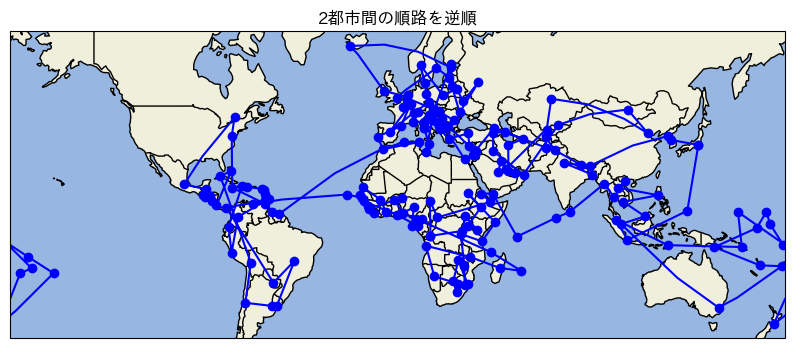

In [32]:
# メルカトル図法での初期値の描画
mercator_plot(min_result, '2都市間の順路を逆順')

In [33]:
# 地球儀上への初期値の描画
globe_plot(Countries, 'two-city-reverse')